## Stokes flow in periodic geometry

In [1]:
## compile PyStokes for this notebook
import os
owd = os.getcwd()
os.chdir('../../pystokes/')
%run setup.py install
os.chdir(owd)

running install
running build
running build_py
running build_ext
running install_lib
running install_egg_info
Removing /data/septal/rs2004/software/anaconda/lib/python2.7/site-packages/pystokes-1.0.0-py2.7.egg-info
Writing /data/septal/rs2004/software/anaconda/lib/python2.7/site-packages/pystokes-1.0.0-py2.7.egg-info


In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pystokes

In [3]:
#Paramter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
F = np.zeros(3*Np)
p = np.zeros(3*Np)
S = np.zeros(5*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points
vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities

xx = np.linspace(0, L, Ng)
yy = np.linspace(0, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))

#initialise
r[0], r[1], r[2]= L/2, L/2, 0   #position
p[0], p[1], p[2]= 0, 1, 0   #orientation
F[0], F[1], F[2]= 0, 1, 0   # force

#stresslet
S0=1
for i in range(Np):
    S[i]      = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]  = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np]  = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])
    
    
####Instantiate the Flow class
pFlow = pystokes.periodic.Flow(a, Np, eta, L, Nt)

### Stokeslet flow

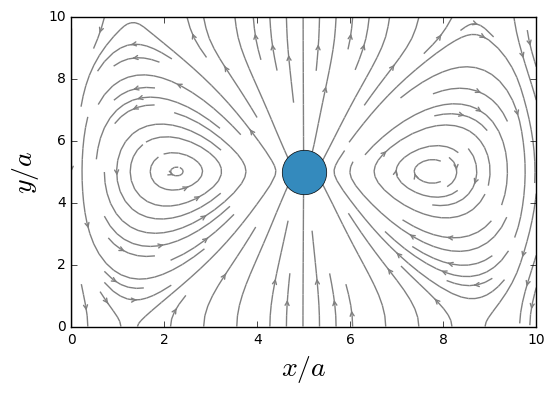

In [4]:
%matplotlib inline
pFlow.stokesletV(vv, rt, r, F)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)
plt.figure()
plt.plot(r[0], r[1], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vx, vy, color="grey", density=1, arrowstyle='->', arrowsize =1)
plt.xlim([0, L])
plt.ylim([0, L])
plt.xlabel(r'$x/a$', fontsize=20)
plt.ylabel(r'$y/a$', fontsize=20)
plt.show()

## Stresslet Flow

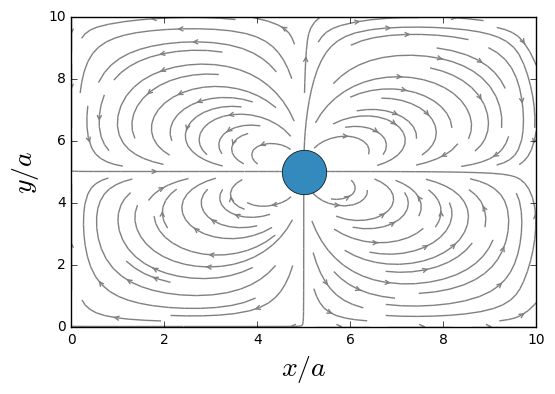

In [5]:
vv=vv*0  # reset the flow
pFlow.stressletV(vv, rt, r, S)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)
plt.figure()
plt.plot(r[0], r[1], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vx, vy, color="grey", density=1, arrowstyle='->', arrowsize =1)
plt.xlim([0, L])
plt.ylim([0, L])
plt.xlabel(r'$x/a$', fontsize=20)
plt.ylabel(r'$y/a$', fontsize=20)
plt.show()

## Mobility of a sedimenting lattice as a function of volume fraction


In [6]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt 
import numpy as np
import pystokes, os, sys
import pyforces

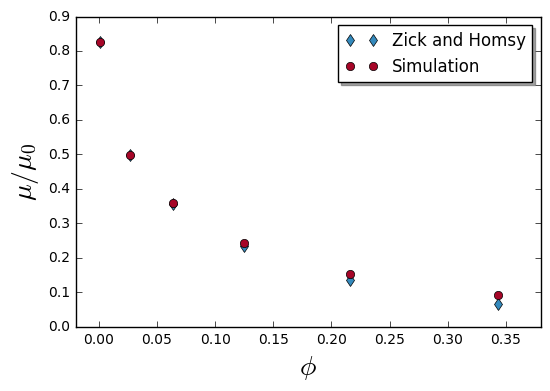

In [7]:
#Parameters
a, eta, dim = 1.0, 1.0/6, 3
Np, Nb, Nm = 1, 1, 6
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7])

#Memory allocation
v = np.zeros(dim*Np)         
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

mu=1.0/(6*np.pi*eta*a)

for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    ff = pyforces.forceFields.Forces(Np)
    ff.sedimentation(F, g=-1)                          
    
    pRbm = pystokes.periodic.Rbm(a, Np, eta, L[i])   
    pRbm.stokesletV(v, r, F, Nb, Nm)                  
    
    phi[i] = (4*np.pi*a**3)/(3*L[i]**3)
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00     


exR = [.825, .498, .356, .233, .134, .065]
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')
plt.xlabel(r'$\phi$', fontsize=20)
plt.xlim(-0.02, 0.38)
plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True)
plt.show()

In [8]:
print 'volume fraction   simulation\t Zick & Homsy (1982)'
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  0.825		 0.825	
0.027		  0.499		 0.498	
0.064		  0.360		 0.356	
0.125		  0.243		 0.233	
0.216		  0.152		 0.134	
0.343		  0.090		 0.065	
